This notebook shows the process of choosing hyperparameters for the methyLImp and nbp for the RRBS data. After the parameters are chosen, a few experiments showing the precision of the methods are performed.

In [1]:
import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "../data/filtered_cytosines_freq_preprocessed.tsv"

# methyLImp parameters

100%|██████████| 10/10 [24:58<00:00, 149.84s/it]


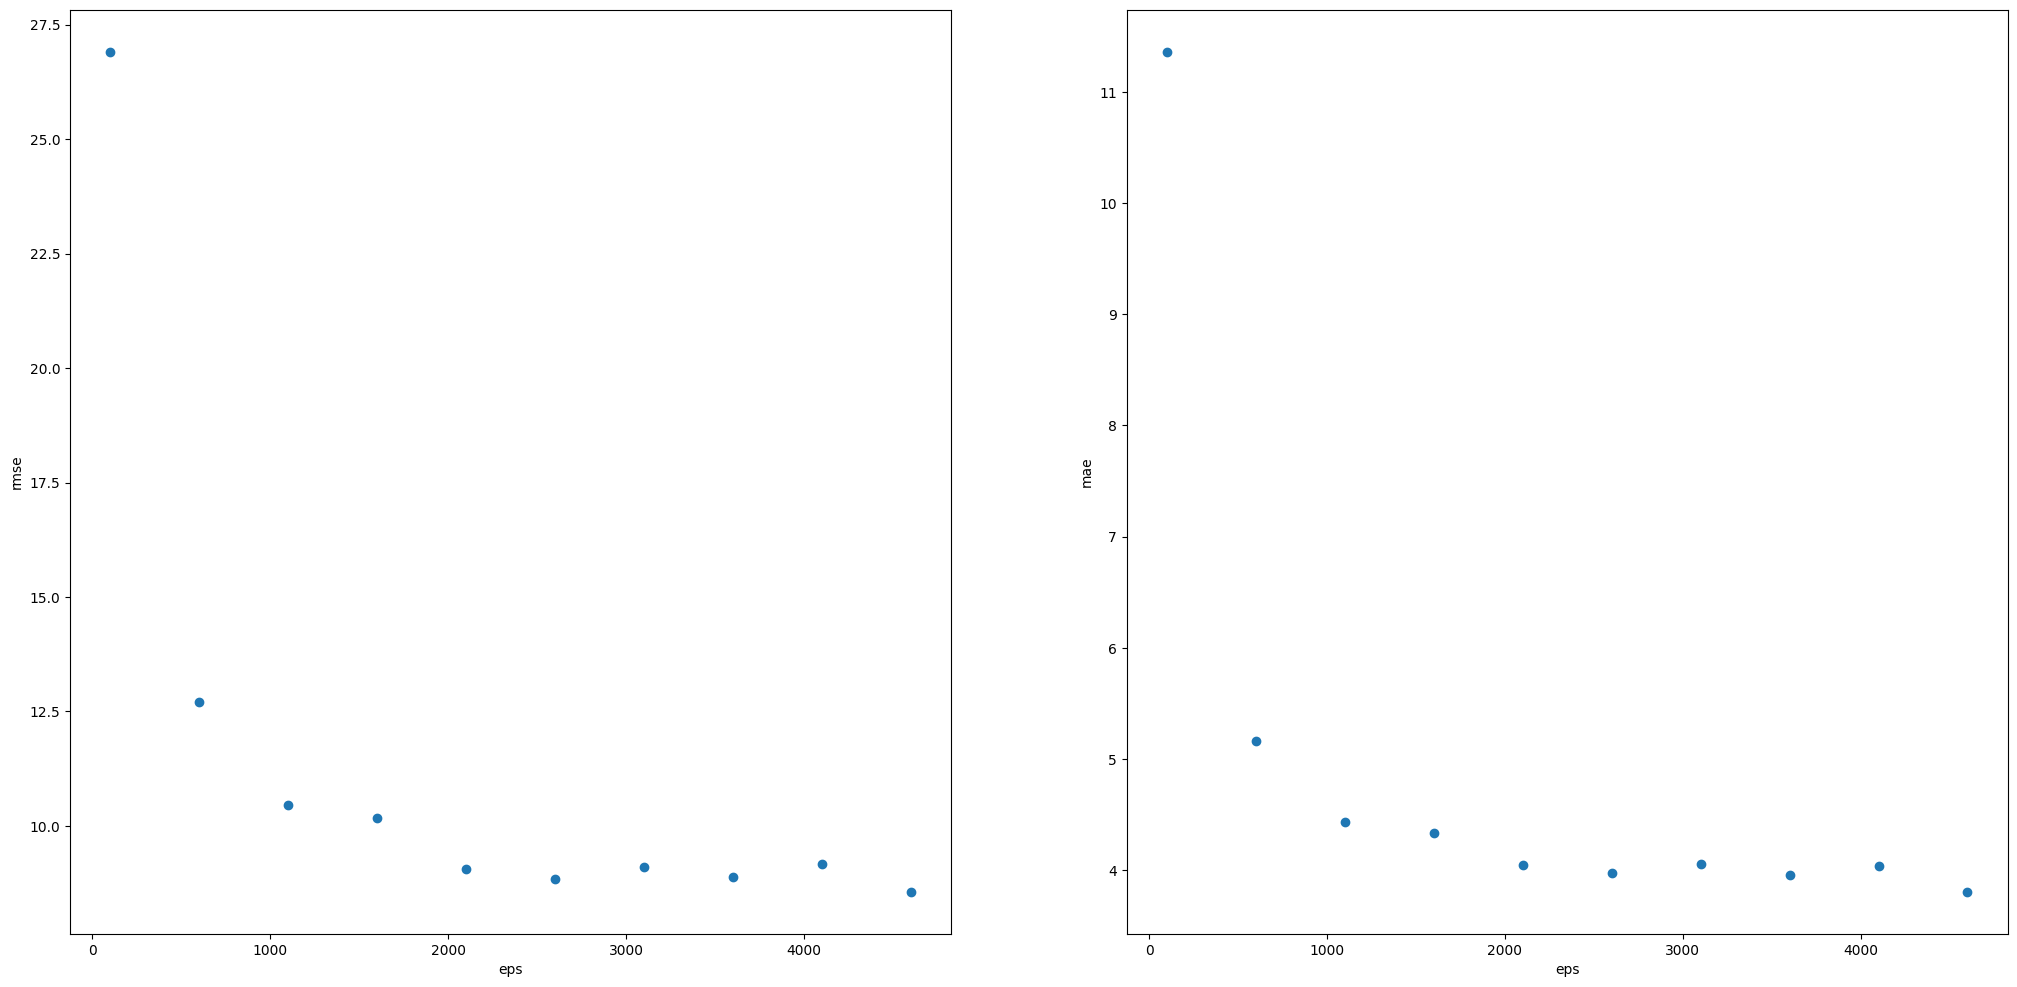

In [2]:
N_methyLImp = 500
eps_min_methyLImp = 100
eps_max_methyLImp = 5000
eps_arr = np.arange(eps_min_methyLImp, eps_max_methyLImp, N_methyLImp)
rmse_lst, mae_lst = utils.methyLImp_eps_dependence(filename, eps_arr)

fig, axes = plt.subplots(1, 2, figsize=(25, 12))

for ax, data, name in zip(axes, [rmse_lst, mae_lst], ["rmse", "mae"]):
    ax.scatter(eps_arr, data)
    ax.set_xlabel("eps")
    ax.set_ylabel(name)

plt.show()

In [ ]:
eps_methyLImp = 3000

# nbp parameters

  0%|          | 0/18 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 18/18 [10:54<00:00, 36.35s/it]


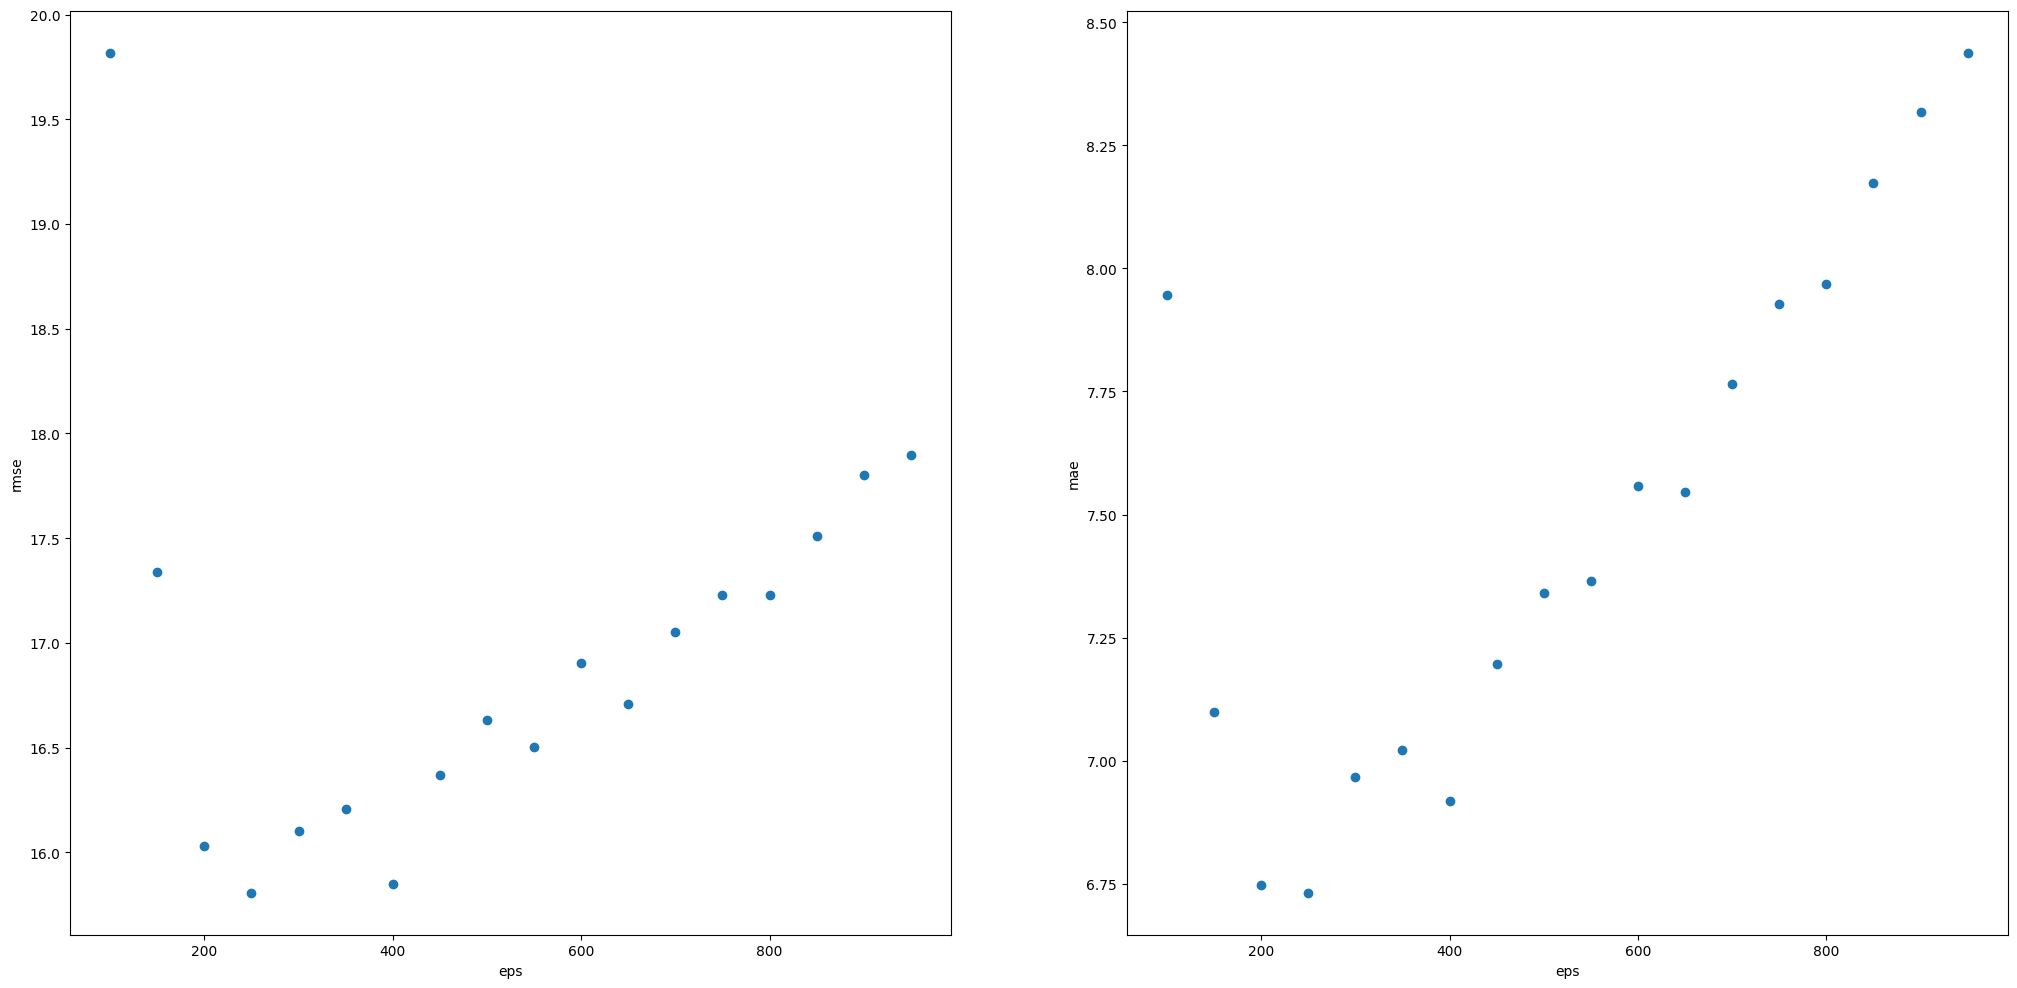

In [6]:
N_nbp = 50
eps_min_methyLImp = 100
eps_max_methyLImp = 1000
eps_arr = np.arange(eps_min_methyLImp, eps_max_methyLImp, N_nbp)
rmse_lst, mae_lst = utils.nbp_eps_dependence(filename, eps_arr, p_impute=0.1)

fig, axes = plt.subplots(1, 2, figsize=(25, 12))

for ax, data, name in zip(axes, [rmse_lst, mae_lst], ["rmse", "mae"]):
    ax.scatter(eps_arr, data)
    ax.set_xlabel("eps")
    ax.set_ylabel(name)

plt.show()

In [ ]:
eps_nbp = 300

# Benchmark tables

In [ ]:
N_iter = 20

In [3]:
benchmark_tables = utils.create_benchmark_table(filename, N_iter, eps_methyLImp, eps_nbp, verbose=1)
benchmark_table_rmse, benchmark_table_mae = benchmark_tables

  0%|          | 0/4 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 4/4 [1:36:59<00:00, 1454.79s/it]


In [16]:
benchmark_table_rmse["nans percent"] = benchmark_table_rmse["nans percent"] / 100
benchmark_table_rmse

,nans percent,methyLImp rmse,nbp rmse,cytosine mean rmse,people mean rmse
0,0.05,8.1 +/- 2.57,16.01 +/- 4.57,6.48 +/- 2.0,44.43 +/- 1.35
1,0.10,8.53 +/- 1.55,14.2 +/- 3.03,6.61 +/- 1.04,44.74 +/- 1.12
2,0.50,8.67 +/- 1.16,15.64 +/- 2.2,6.68 +/- 0.88,44.8 +/- 0.54
3,1.00,8.83 +/- 0.47,16.26 +/- 1.32,6.75 +/- 0.39,44.77 +/- 0.32


In [17]:
benchmark_table_mae["nans percent"] = benchmark_table_mae["nans percent"] * 100
benchmark_table_mae

,nans percent,methyLImp mae,nbp mae,cytosine mean mae,people mean mae
0,0.05,3.8 +/- 1.2,7.03 +/- 1.88,3.41 +/- 0.91,42.73 +/- 1.59
1,0.10,3.92 +/- 0.56,6.51 +/- 1.1,3.4 +/- 0.44,43.25 +/- 1.18
2,0.50,3.86 +/- 0.41,6.79 +/- 0.89,3.38 +/- 0.28,43.34 +/- 0.64
3,1.00,3.94 +/- 0.17,6.98 +/- 0.52,3.4 +/- 0.16,43.31 +/- 0.38


# Multiple tests

In [6]:
results = utils.run_experiments(filename, N_iter, eps_methyLImp, eps_nbp, p_arr=[0.01], verbose=2)

  0%|          | 0/1 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 1/1 [31:37<00:00, 1897.15s/it]


In [7]:
methods = ["methyLImp", "nbp", "cytosine mean", "people mean"]

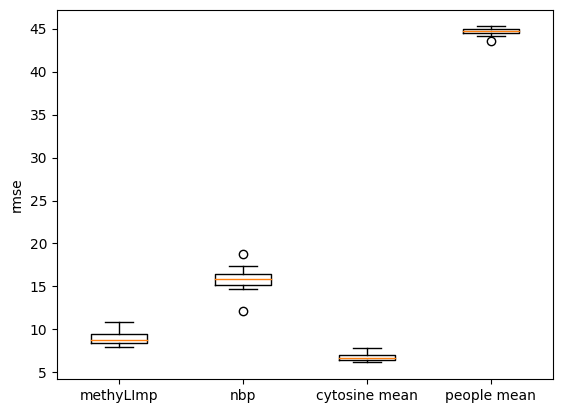

In [10]:
plt.boxplot([results[method + " rmse"][0] for method in methods[:4]], labels=methods)
plt.ylabel("rmse")
plt.show()

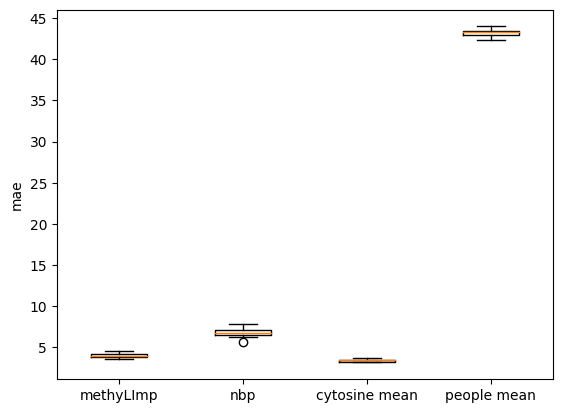

In [11]:
plt.boxplot([results[method + " mae"][0] for method in methods[:4]], labels=methods)
plt.ylabel("mae")
plt.show()

In [13]:
del results["nans percent"]
for key in results.keys():
    results[key] = np.array(results[key][0])
np.savez("boxplot_data_rrbs_1_percent.npz", **results)